
# Project: Investigate a Dataset: TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report we will be investigating movies dataset, This data set contains information about 10,000 movies collected from The **Movie Database (TMDb)**, including genres, release year, user ratings, revenue, etc. First, we will analyze the dataset and then communicate our findings about it. we will use the Python libraries NumPy, pandas, and Matplotlib to make the analysis easier.

### **First,** 
To understand what questions the data can answer, we need to know what are the provided information from the dataset for each movie. Let's import all the necessary libraries and print the first rows in the data.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Reading CSV file using pandas
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [2]:
# Extract the number of entries and columns, Then get the type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### **About the dataset,** 
* Number of rows: 10866
* Number of columns: 21
* Missing data: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies

### **Second, What information we want to get from the data** 
#### Questions:
1. How many movies released in each year? Which year has the max? Which year has the min? Which year made the most profits?
2. Which genres are most through all the years? Which genres are popular in specific year?
3. Which month has more movies? Which season has more movies?

#### High & Low: Highest and Lowest movies based on:
* popularity?
* budget?
* revenue?
* profits?
* runtime?
* rating?

#### Lists:
1. Top 5 production companies?
2. Top 5 directors?
3. Top 5 actors?

#### Statistics: mean, median and mode for:
* popularity?
* budget?
* revenue?
* profits?
* runtime?
* rating?

#### Relations:: Does these things affect on movies?
* runtime VS rating
* runtime VS year
* popularity VS year

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
print(df.dtypes)
print("\n\nThe dataset shape is:" + str(df.shape))

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


The dataset shape is:(10866, 21)


### Data Cleaning,
1. Remove duplicate rows.
2. Remove unwanted columns.
3. Change types, release_date to datetime & budget to int & revenue to int.
4. Replcae zero with NAN.
5. Add profits column.

#### 1. Remove duplicate rows:

In [4]:
#1 Remove duplicate rows
print("There are: "+ str(df.duplicated().sum()) +" duplicate row/s")
df.drop_duplicates(inplace=True)
print("Dataset shape after deleting duplicate rows: "+ str(df.shape))

There are: 1 duplicate row/s
Dataset shape after deleting duplicate rows: (10865, 21)


#### 2. Remove unwanted columns:

In [5]:
#2 Remove unwanted columns
# Create coulmn list:
columns = ['imdb_id','tagline','overview','budget_adj','revenue_adj','keywords','homepage']
df = df.drop(columns,1)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [6]:
print("Dataset shape after removeing unwanted columns: "+ str(df.shape))

Dataset shape after removeing unwanted columns: (10865, 14)


#### 3. Change types:
Since we are going to use release_date in later data investigation, we need to convert it to datetime to make it easier. Also, we don't need the float value we just need the int value for  budget & revenue.

In [7]:
#3 Change Types, First release_date
df.release_date = pd.to_datetime(df['release_date'])
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [8]:
#3 Change Types, Second budget & revenue
df['budget'] = df['budget'].apply(np.int64)
df['revenue'] = df['revenue'].apply(np.int64)
print("Budget type: "+ str(df['budget'].dtypes) +", Revenue type: "+ str(df['revenue'].dtypes))

Budget type: int64, Revenue type: int64


#### 4. Replcae zero with NAN:
1. First, need to check all the numeric columns "popularity, budget, revenue, runtime, vote_count, vote_average" which ones have zeros.

In [9]:
#4 Replcae zero with NAN, Check values
print("popularity: ", df[(df['popularity']==0)].shape[0])
print("budget: ", df[(df['budget']==0)].shape[0])
print("revenue: ", df[(df['revenue']==0)].shape[0])
print("runtime: ", df[(df['runtime']==0)].shape[0])
print("vote_count: ", df[(df['vote_count']==0)].shape[0])
print("vote_average: ", df[(df['vote_average']==0)].shape[0])

popularity:  0
budget:  5696
revenue:  6016
runtime:  31
vote_count:  0
vote_average:  0


2. Second, only budget & revenue have zero values. Deleting them wil cause a major data lose. so we will replace it with NAN.

In [10]:
#4 Replcae zero with NAN, Chang values
df['budget'] = df['budget'].replace(0, np.NAN)
df['revenue'] = df['revenue'].replace(0, np.NAN)

print("budget: ", df[(df['budget']==0)].shape[0])
print("revenue: ", df[(df['revenue']==0)].shape[0])

budget:  0
revenue:  0


#### 5. Add profits column:

In [11]:
# Add new coloumn
df['profits'] = df['revenue'] - df['budget']

In [12]:
#Check the final result for the file:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
profits                 3854 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 1.3+ MB


### Now, 
save all the results in new CSV.

In [13]:
# Save results to new CSV
df.to_csv('movies.csv', index=False)
print("Final dataset shape after cleaning: " + str(df.shape))

Final dataset shape after cleaning: (10865, 15)


<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
# Functions:
def countData(column):
    count = df.groupby(column)['id'].count() #Count rows based on id column
    return count

def SumDataGroup(column1, column2):
    sumData = df.groupby(column1)[column2].sum() #Sum rows based on given columns
    return sumData

def countPipeData(column):
    data = df[column].str.cat(sep='|') #Take a column, separate the string by pipe'|'
    data = pd.Series(data.split('|')) #Store the results
    count = data.value_counts(ascending=False) #DESC order, largest to smallest
    return count

def countDataByYear(column, year):
    yeardf = df[df.release_year == year] #Take only specific year results
    data = yeardf[column].str.cat(sep='|') #Take a column, separate the string by pipe'|'
    data = pd.Series(data.split('|')) #Store the results
    count = data.value_counts(ascending=False) #DESC order, largest to smallest
    return count

### Research Questions 1 (Questions)
#### 1. How many movies released in each year? Which year has the max? Which year has the min? Which year made the most and the least profits?

There are: 56 years in the dataset, From: 1960 until: 2015
Released movies in each year:.


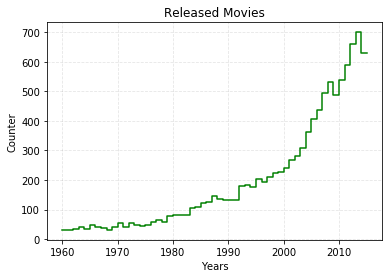

Largest number of released movies in: 2014 with: 700 movies, Smallest number of released movies in: 1961 with: 31 movies.

Top 5 years in making profits:
release_year
2015    1.903215e+10
2014    1.667620e+10
2012    1.659685e+10
2013    1.578274e+10
2011    1.496669e+10
Name: profits, dtype: float64

Last 5 years in making profits:
release_year
1966     52468689.0
1960    108198052.0
1963    115411882.0
1962    166879846.0
1968    168271762.0
Name: profits, dtype: float64


In [15]:
count = countData('release_year') #How many movies released in each year?
length = len(count)

print("There are: "+str(length)+" years in the dataset, From: "+str(count.index[0])+" until: "+str(count.index[length-1]))
print("Released movies in each year:.")

plt.title('Released Movies') #Create chart: number of movies in each year
plt.xlabel('Years')
plt.ylabel('Counter')
plt.grid(color='gray', linestyle='dashed', alpha=0.2)
plt.plot(count, color='green', drawstyle='steps')
plt.show()

maxi = max(count)
mini = min(count)
maxIndex = count.idxmax() #Which year has the max? 
minIndex = count.idxmin() #Which year has the min?

print("Largest number of released movies in: "+str(maxIndex)+ " with: " +str(maxi)+" movies, "+ 
      "Smallest number of released movies in: "+str(minIndex)+ " with: " +str(mini)+" movies.\n")

print("Top 5 years in making profits:")
sumData = SumDataGroup('release_year','profits') #Which year made the most and the least profits
sumData.sort_values(ascending=False, inplace=True)
print(sumData.head())

print("\nLast 5 years in making profits:")
sumData.sort_values(ascending=True, inplace=True)
print(sumData.head())

#### 2. Which genres are most through all the years? Which genres are popular in a specific year?

Genres through all the years:
There are: 20 genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


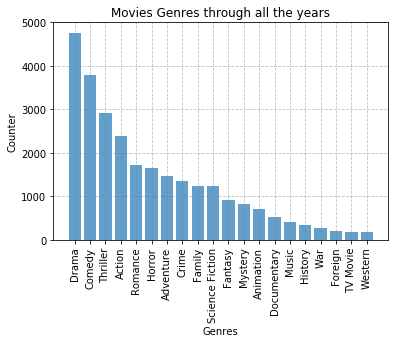

Genres through my year 1995 :), Displayed as pie for a change:
There are: 19 genres
Drama              93
Comedy             63
Thriller           49
Action             47
Romance            37
Family             33
Adventure          32
Crime              31
Horror             19
Science Fiction    18
Fantasy            17
Mystery            14
Animation           7
History             7
War                 5
Western             3
Documentary         2
Foreign             2
TV Movie            1
dtype: int64


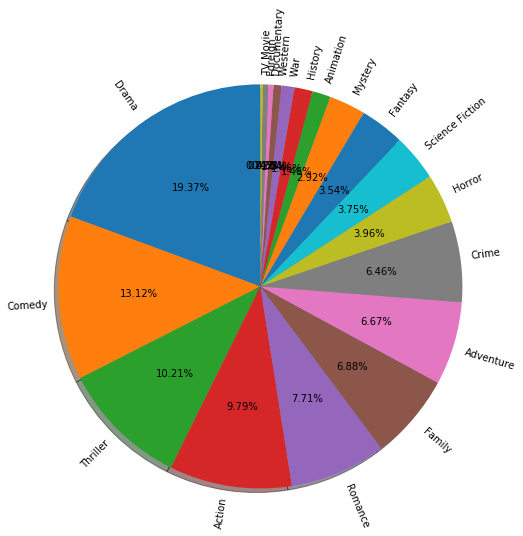

In [16]:
print("Genres through all the years:")
count = countPipeData('genres') # This might not be accurate since each movie will have more than one genres
length = len(count)
print("There are: "+str(length)+" genres")
print(count)

plt.bar(range(length), count, align='center', alpha=0.7) # Chart for the most popular geners
plt.xticks(range(length), count.keys())
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.ylabel('Counter')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.title('Movies Genres through all the years')
plt.show()

print("Genres through my year 1995 :), Displayed as pie for a change:")
count = countDataByYear('genres',1995)
length = len(count)
print("There are: "+str(length)+" genres")
print(count)

plt.figure(figsize=[8, 8])
plt.pie(count, labels=count.keys(), autopct='%.2f%%',  shadow=True, startangle=90, rotatelabels='True', labeldistance=1.05)
plt.axis('equal')
plt.show()

#### 3. Which month has more movies? Which season has more movies? 

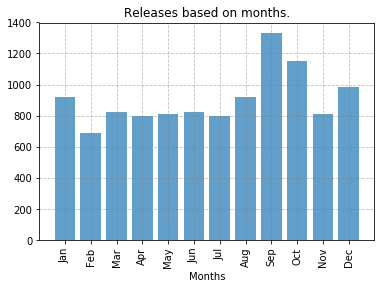

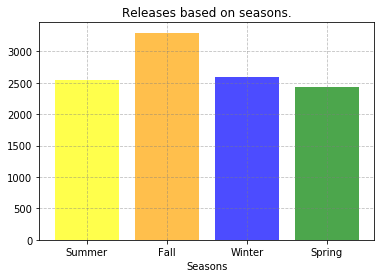

In [17]:
monthsData = df['release_date'].dt.month #Which month has more movies?
monthsCount = monthsData.value_counts().sort_index() # sort months

bins = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # Disply bu months
plt.bar(range(12), monthsCount, align='center', alpha=0.7)
plt.xticks(range(12), bins)
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.title('Releases based on months.')
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.show()

# Add the months to seasons to be more clear
seasonArray = {'Summer': (monthsCount.values[5]+monthsCount.values[6]+monthsCount.values[7])
               ,'Fall': (monthsCount.values[8]+monthsCount.values[9]+monthsCount.values[10])
               ,'Winter': (monthsCount.values[11]+monthsCount.values[0]+monthsCount.values[1])
               ,'Spring': (monthsCount.values[2]+monthsCount.values[3]+monthsCount.values[4])}
plt.bar(range(4), seasonArray.values(), align='center', alpha=0.7, color=('yellow', 'orange', 'blue', 'green'))
plt.xticks(range(4), seasonArray.keys())
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.title('Releases based on seasons.')
plt.xlabel('Seasons')
plt.show()

### Research Questions 2  (High and Low)
#### 1. Highest and Lowest movies based on:
* popularity? 
* budget? 
* revenue?
* profits?
* runtime?
* rating?

In [18]:
#Functions:
def Movies(column):
    newData = df[pd.notnull(df[column])] #First remove all null values so it will not be consider as the lowest
    moviesData = pd.DataFrame(newData[column].sort_values(ascending = False)) #Sort the values
    moviesData['original_title'] = newData['original_title']
    movieList = list(map(str,(moviesData['original_title'])))
    
    movieName1 = list(movieList[:1]) #Highest
    MovieNumber1 = list(moviesData[column][:1])
    
    movieName2 = list(movieList[-1:]) #Lowest
    MovieNumber2 = list(moviesData[column][-1:])
    
    resultStr = "Highest: "+str(movieName1)+", with: "+str(MovieNumber1)+"\nLowest: "+str(movieName2)+", with: "+str(MovieNumber2)
    return resultStr

In [19]:
print("Movies based on popularity: ")
print(Movies('popularity'))

print("\nMovies based on revenue: ")
print(Movies('revenue'))

print("\nMovies based on budget: ")
print(Movies('budget'))

print("\nMovies based on profits: ")
print(Movies('profits'))

print("\nMovies based on runtime: ")
print(Movies('runtime'))

print("\nMovies based on rating: ")
print(Movies('vote_average'))

Movies based on popularity: 
Highest: ['Jurassic World'], with: [32.985763]
Lowest: ['North and South, Book I'], with: [6.500000000000001e-05]

Movies based on revenue: 
Highest: ['Avatar'], with: [2781505847.0]
Lowest: ['Shattered Glass'], with: [2.0]

Movies based on budget: 
Highest: ["The Warrior's Way"], with: [425000000.0]
Lowest: ['Love, Wedding, Marriage'], with: [1.0]

Movies based on profits: 
Highest: ['Avatar'], with: [2544505847.0]
Lowest: ["The Warrior's Way"], with: [-413912431.0]

Movies based on runtime: 
Highest: ['The Story of Film: An Odyssey'], with: [900]
Lowest: ['Anarchy Parlor'], with: [0]

Movies based on rating: 
Highest: ['The Story of Film: An Odyssey'], with: [9.2]
Lowest: ['Manos: The Hands of Fate'], with: [1.5]


### Research Questions 3  (Lists)

#### 1. Top 5 movie production companies make the most movies?

There are: 7879 production companies, Top Five: 
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
dtype: int64


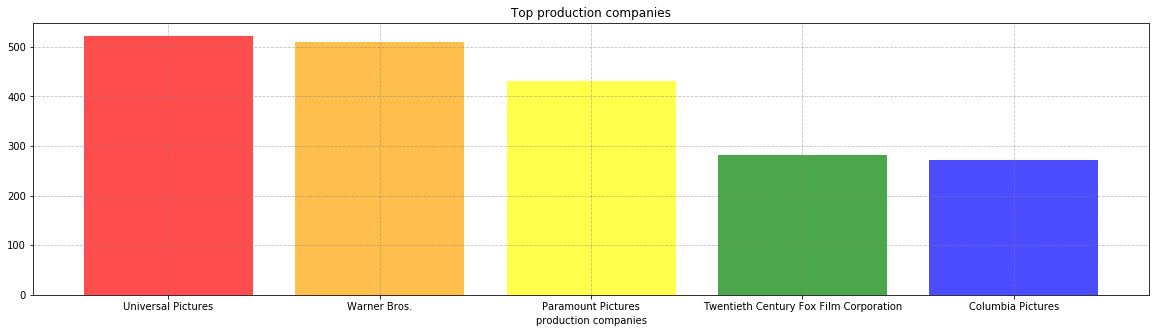

In [20]:
count = countPipeData('production_companies') # Since movies might have more than company
length = len(count)
print("There are: "+str(length)+" production companies, Top Five: ")

topFive = count.head(5) #Display only top 5
print(topFive)

plt.figure(figsize=[20, 5])
plt.bar(range(5), topFive, align='center', alpha=0.7, color=('red', 'orange', 'yellow', 'green','blue'))
plt.xticks(range(5), topFive.keys())
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.title('Top production companies')
plt.xlabel('production companies')
plt.show()

#### 2. Top 5 directors?

There are: 5362 directors, Top Five: 
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
dtype: int64


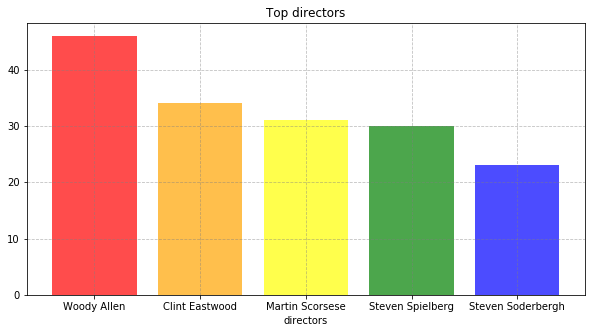

In [21]:
count = countPipeData('director') # Movie might have more than one director
length = len(count)
print("There are: "+str(length)+" directors, Top Five: ")

topFive = count.head(5)
print(topFive)

plt.figure(figsize=[10, 5])
plt.bar(range(5), topFive, align='center', alpha=0.7, color=('red', 'orange', 'yellow', 'green','blue'))
plt.xticks(range(5), topFive.keys())
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.title('Top directors')
plt.xlabel('directors')
plt.show()

#### 3. Top 5 actors?

There are: 19026 actors, Top Five: 
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64


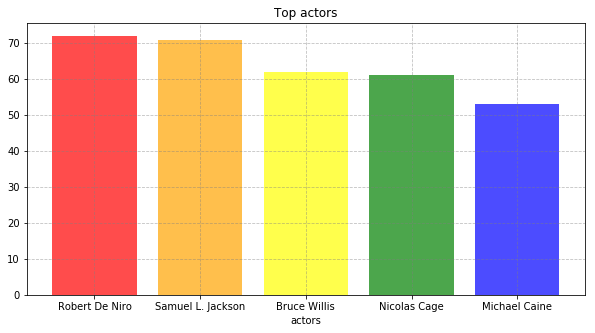

In [22]:
count = countPipeData('cast') # Each movie have more than one actor
length = len(count)
print("There are: "+str(length)+" actors, Top Five: ")

topFive = count.head(5)
print(topFive)

plt.figure(figsize=[10, 5])
plt.bar(range(5), topFive, align='center', alpha=0.7, color=('red', 'orange', 'yellow', 'green','blue'))
plt.xticks(range(5), topFive.keys())
plt.grid(color='gray', linestyle='dashed', alpha=0.5)
plt.title('Top actors')
plt.xlabel('actors')
plt.show()

### Research Questions 4  (Statistics)
#### Find mean? median? mode? for:
* popularity?
* budget?
* revenue?
* profits?
* runtime?
* rating?

In [23]:
# Find all the statistics values for each numeric value
# The mean is the usual average
# The median is the middle number
# The mode is the number that is repeated more often than any other, We will put the first one here


mean = df['popularity'].mean()
median = df['popularity'].median()
mode = df['popularity'].mode()
print("Popularity: Mean {0:,.3f}, Media {1:,.3f}, Mode {2:,.3f}.".format(mean,median,mode[0]))

mean = df['budget'].mean()
median = df['budget'].median()
mode = df['budget'].mode()
print("\nBudget: Mean {0:,.2f}, Media {1:,.2f}, Mode {2:,.2f}.".format(mean,median,mode[0]))

mean = df['revenue'].mean()
median = df['revenue'].median()
mode = df['revenue'].mode()
print("\nRevenue: Mean {0:,.2f}, Media {1:,.2f}, Mode {2:,.2f}.".format(mean,median,mode[0]))

mean = df['profits'].mean()
median = df['profits'].median()
mode = df['profits'].mode()
print("\nProfits: Mean {0:,.2f}, Media {1:,.2f}, Mode {2:,.2f}.".format(mean,median,mode[0]))

mean = df['runtime'].mean()
median = df['runtime'].median()
mode = df['runtime'].mode()
print("\nRuntime: Mean {0:,.2f}, Media {1:,.2f}, Mode {2:,.2f}.".format(mean,median,mode[0]))

mean = df['vote_average'].mean()
median = df['vote_average'].median()
mode = df['vote_average'].mode()
print("\nRating: Mean {0:,.2f}, Media {1:,.2f}, Mode {2:,.2f}.".format(mean,median,mode[0]))

Popularity: Mean 0.646, Media 0.384, Mode 0.012.

Budget: Mean 30,739,575.95, Media 17,000,000.00, Mode 20,000,000.00.

Revenue: Mean 89,238,858.71, Media 31,853,080.00, Mode 12,000,000.00.

Profits: Mean 70,482,919.14, Media 20,020,190.00, Mode 1,000,000.00.

Runtime: Mean 102.07, Media 99.00, Mode 90.00.

Rating: Mean 5.98, Media 6.00, Mode 6.10.


### Research Questions 5  (Relations)
#### Does these things affect on movies?
* runtime VS rating
* runtime VS year
* popularity VS year

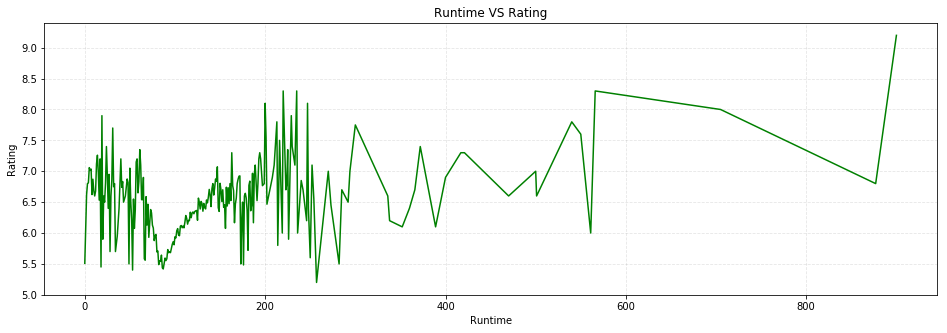

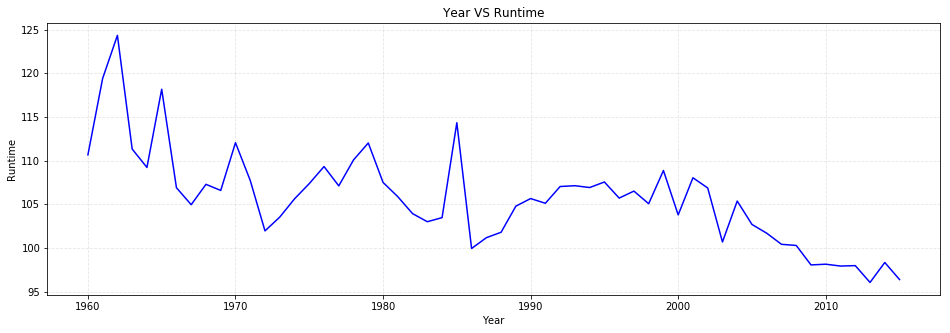

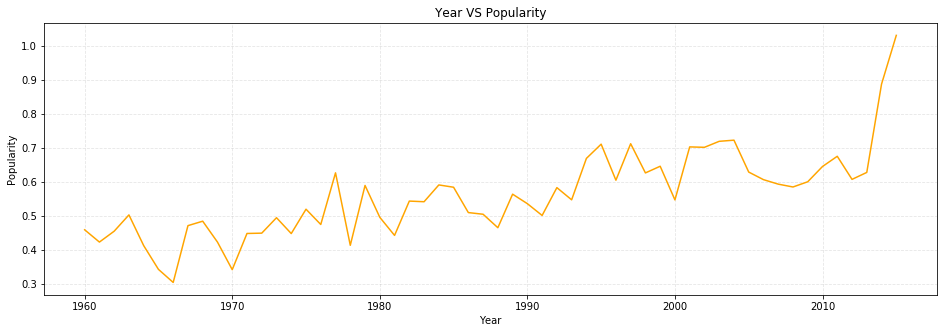

In [24]:
# 1. If the movies are too long or too short, will it affect the rating?
data1 = df.groupby('runtime')['vote_average'].mean()
plt.figure(figsize=[16, 5])
plt.title('Runtime VS Rating')
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.grid(color='gray', linestyle='dashed', alpha=0.2)
plt.plot(data1, color='green')
plt.show()

# 2. Are movies getting longer or shorter through the years?
data2 = df.groupby('release_year')['runtime'].mean()
plt.figure(figsize=[16, 5])
plt.title('Year VS Runtime')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.grid(color='gray', linestyle='dashed', alpha=0.2)
plt.plot(data2, color='blue')
plt.show()

# 3. Are movies getting more popular through the years?
data2 = df.groupby('release_year')['popularity'].mean()
plt.figure(figsize=[16, 5])
plt.title('Year VS Popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(color='gray', linestyle='dashed', alpha=0.2)
plt.plot(data2, color='orange')
plt.show()

<a id='conclusions'></a>
## Conclusions
#### The dataset is for 10865 movies, from 1960 until 2015.
* Now a days we have more movies than before (Questions#1 Chart), it is becoming a huge source of money. Largest number of released movies in: 2014 with: 700 movies, Smallest number of released movies in: 1961 with: 31 movies.
* From 1960 to 2015, the most popular genres are in order: Drama, Comedy and Thriller (Questions#2 Chart A).
* In my year 1995, the most popular genre is Drama, which also my favorite (Questions#2 Chart B).
* Most movies are released in the fall; especially September (Questions#3 Charts).

#### Highest and Lowest:
* Highest movies based on popularity: Jurassic World, Lowest: North and South, Book I.
* Highest movies based on revenue: Avatar, Lowest: Shattered Glass.
* Highest movies based on budget: The Warrior's Way, Lowest: Love, Wedding, Marriage.
* Highest movies based on profits: Avatar, Lowest: The Warrior's Way.
* Highest movies based on runtime: The Story of Film: An Odyssey, Lowest: Anarchy Parlor.
* Highest movies based on rating: The Story of Film: An Odyssey, Lowest: Manos: The Hands of Fate.

#### There are: 7879 production companies, Top Five (List#1 Chart): 
1. Universal Pictures, 522 movies.
2. Warner Bros, 509 movies.
3. Paramount Pictures, 431 movies.
4. Twentieth Century Fox Film Corporation, 282 movies.
5. Columbia Pictures, 272 movies.

#### There are: 5362 directors, Top Five (List#2 Chart): 
1. Woody Allen, 46 movies.
2. Clint Eastwood, 34 movies.
3. Martin Scorsese, 31 movies.
4. Steven Spielberg, 30 movies.
5. Steven Soderbergh, 23 movies.

#### There are: 19026 actors, Top Five (List#3 Chart): 
1. Robert De Niro, 72 movies.
2. Samuel L. Jackson, 71 movies.
3. Bruce Willis, 62 movies.
4. Nicolas Cage, 61movies.
5. Michael Caine, 53 movies.

#### Mean, Median and Mode:
1. Popularity: Mean 0.646, Media 0.384, Mode 0.012.
2. Budget: Mean 30,739,575.95, Media 17,000,000.00, Mode 20,000,000.00.
3. Revenue: Mean 89,238,858.71, Media 31,853,080.00, Mode 12,000,000.00.
4. Profits: Mean 70,482,919.14, Media 20,020,190.00, Mode 1,000,000.00.
5. Runtime: Mean 102.07, Media 99.00, Mode 90.00.
6. Rating: Mean 5.98, Media 6.00, Mode 6.10.

#### Relations:
* I always thought that if the movie is too long it will have a lower rating. However, there is no clear relation between runtime and rating, so we cannot give a conclusion (Relations#1 Chart). 
* On Average, movies are getting shorter every year (Relations#2 Chart)
* Movies getting more popular through the years, which is clear we can see it everywhere (Relations#3 Chart).

### Limitations
* Some of the data are missing values, and replaced by NAN. So the results might be not %100 correct. 
* Also not all the movies from 1960 to 2015 are there, and some of them are not updated.

### Resources
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
* https://pandas.pydata.org/pandas-docs/stable/api.html#reshaping-sorting
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
* http://www.nxn.se/valent/making-nicer-looking-pie-charts-with-matplotlib
* https://pythonspot.com/matplotlib-pie-chart/
* https://www.purplemath.com/modules/meanmode.htm
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html
* https://www.programiz.com/python-programming/methods/list/sort

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0